@TODO:
- add those separated evaluations and divide by 3
- take those examples and implement them for the extra points

In [32]:
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
flowers = pd.read_csv("https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2022-2023/labs/lab05/flowers.csv")
sport = pd.read_csv("https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2022-2023/labs/lab05/sport.csv")

In [4]:
print(len(sport))

20


In [5]:
sport['Weight'][19]
real_sport_weight = [sport['Weight'][i] for i in range(len(sport))]
real_sport_waist = [sport['Waist'][i] for i in range(len(sport))]
real_sport_pulse = [sport['Pulse'][i] for i in range(len(sport))]
computedWeight = [sport['PredictedWeight'][i] for i in range(len(sport))]
computedWaist = [sport['PredictedWaist'][i] for i in range(len(sport))]
computedPulse = [sport['PredictedPulse'][i] for i in range(len(sport))]

print(real_sport_weight)
print(computedWeight)

[191, 189, 193, 162, 189, 182, 211, 167, 176, 154, 169, 166, 154, 247, 193, 202, 176, 157, 156, 138]
[199, 182, 203, 159, 182, 184, 212, 168, 177, 154, 161, 172, 146, 249, 192, 205, 170, 148, 166, 144]


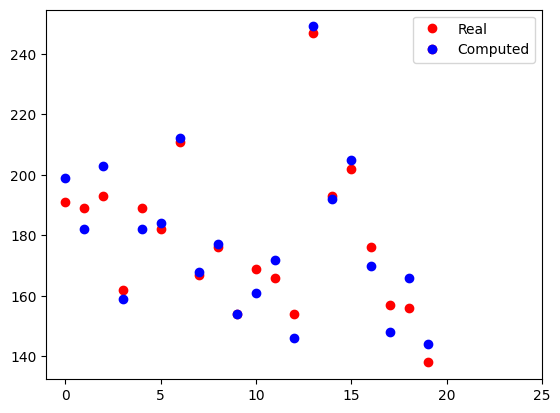

In [6]:
# plot the data - weight
indexes = [i for i in range(len(real_sport_weight))]
real, = plt.plot(indexes, real_sport_weight, 'ro', label = 'real')
computed, = plt.plot(indexes, computedWeight, 'bo', label = 'computed')
plt.xlim(-1, 25)
plt.legend([real, (real, computed)], ["Real", "Computed"])
plt.show()


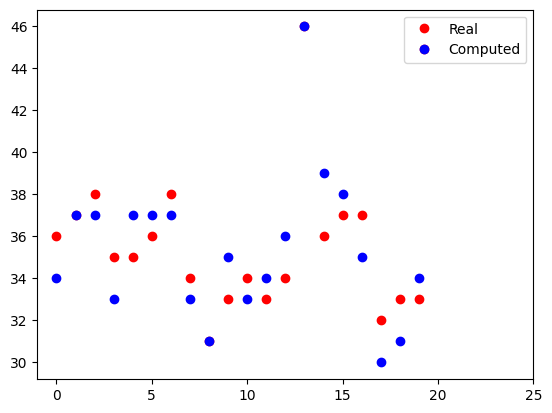

[36, 37, 38, 35, 35, 36, 38, 34, 31, 33, 34, 33, 34, 46, 36, 37, 37, 32, 33, 33]
[34, 37, 37, 33, 37, 37, 37, 33, 31, 35, 33, 34, 36, 46, 39, 38, 35, 30, 31, 34]


In [7]:
indexes = [i for i in range(len(real_sport_waist))]
real, = plt.plot(indexes, real_sport_waist, 'ro', label = 'real')
computed, = plt.plot(indexes, computedWaist, 'bo', label = 'computed')
plt.xlim(-1, 25)
plt.legend([real, (real, computed)], ["Real", "Computed"])
plt.show()
print(real_sport_waist)
print(computedWaist)

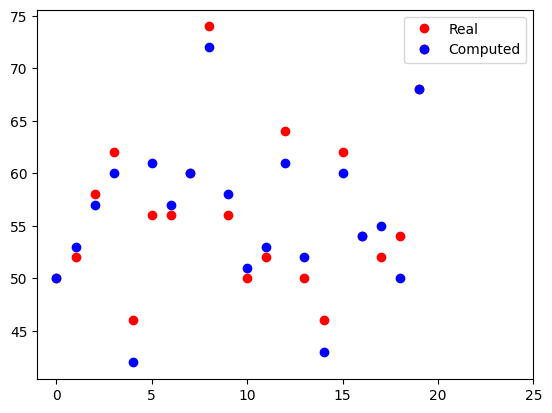

[50, 52, 58, 62, 46, 56, 56, 60, 74, 56, 50, 52, 64, 50, 46, 62, 54, 52, 54, 68]
[50, 53, 57, 60, 42, 61, 57, 60, 72, 58, 51, 53, 61, 52, 43, 60, 54, 55, 50, 68]


In [8]:
indexes = [i for i in range(len(real_sport_pulse))]
real, = plt.plot(indexes, real_sport_pulse, 'ro', label = 'real')
computed, = plt.plot(indexes, computedPulse, 'bo', label = 'computed')
plt.xlim(-1, 25)
plt.legend([real, (real, computed)], ["Real", "Computed"])
plt.show()
print(real_sport_pulse)
print(computedPulse)

[Explanation](https://www.enjoyalgorithms.com/blog/loss-and-cost-functions-in-machine-learning)

# MAE - L1 loss -> the loss function is the Absolute Error
Regression problems may have variables that are not strictly Gaussian in nature due to the presence of outliers (values that are very different from the rest of the data). Mean Absolute Error would be an ideal option in such cases because it does not take into account the direction of the outliers (unrealistically high positive or negative values).

#RMSE - L2 loss -> loss functions is square root error
RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

---
<br>

L1 loss is more robust than its counterpart.
On taking a closer look at the formulas, one can observe that if the difference between the predicted and the actual value is high, L2 loss magnifies the effect when compared to L1. Since L2 succumbs to outliers, L1 loss function is the more robust loss function.

L1 loss is less stable than L2 loss.
Since L1 loss deals with the difference in distances, a small horizontal change can lead to the regression line jumping a large amount. Such an effect taking place across multiple iterations would lead to a significant change in the slope between iterations.

On the other hand, MSE ensures the regression line moves lightly for a small adjustment in the data point.

---

<br>

Huber Loss - a bit of both

In [34]:
# MAE
print("WEIGHT")
errorL1WE = sum(abs(r - c) for r, c in zip(real_sport_weight, computedWeight)) / len(real_sport_weight)
print('Error (L1): ', errorL1WE)

# RMSE
errorL2WE = sqrt(sum((r - c) ** 2 for r, c in zip(real_sport_weight, computedWeight)) / len(real_sport_weight))
print('Error (L2): ', errorL2WE)

WEIGHT
Error (L1):  4.95
Error (L2):  5.953990258641679


In [35]:
# MAE
print("WAIST")
errorL1WA = sum(abs(r - c) for r, c in zip(real_sport_waist, computedWaist)) / len(real_sport_waist)
print('Error (L1): ', errorL1WA)

# RMSE
errorL2WA = sqrt(sum((r - c) ** 2 for r, c in zip(real_sport_waist, computedWaist)) / len(real_sport_waist))
print('Error (L2): ', errorL2WA)

WAIST
Error (L1):  1.35
Error (L2):  1.5652475842498528


In [36]:
# MAE
print("PULSE")
errorL1PU = sum(abs(r - c) for r, c in zip(real_sport_pulse, computedPulse)) / len(real_sport_pulse)
print('Error (L1): ', errorL1PU)

# RMSE
errorL2PU = sqrt(sum((r - c) ** 2 for r, c in zip(real_sport_pulse, computedPulse)) / len(real_sport_pulse))
print('Error (L2): ', errorL2PU)

PULSE
Error (L1):  1.85
Error (L2):  2.3345235059857505


In [37]:
print("Error (L1) -> sports.csv: ", (errorL1WE+errorL1WA+errorL1PU))
print("Error (L2) -> sports.csv: ", (errorL2WE+errorL2WA+errorL2PU))

Error (L1) -> sports.csv:  8.15
Error (L2) -> sports.csv:  9.853761348877281


In [ ]:
def loss_regression_sum(real, computed):
    error = 0
    for r, c in zip(real, computed):
        for index in range(len(r)):
            error += abs(r[index] - c[index])
    return error

In [48]:
def hubber_loss (real, computed, delta, MAE):
  delta = 1.35 * MAE
  total_error = 0
  for i in range (len(real)):
    error = np.absolute(real[i] - computed[i])
    if error < delta:
      hubber_error = (error * error) / 2
    else:
      hubber_error = (delta * error) / (0.5 * (delta * delta))
    total_error += hubber_error
  #  total_hubber_error = total_error/len(real)
  #  return total_hubber_error  
  return total_error

In [49]:
print(hubber_loss(real_sport_weight, computedWeight, 1.35, errorL1WE))

89.05237560793117


In [12]:
display(flowers)

,Type,PredictedType
0,Daisy,Daisy
1,Tulip,Daisy
2,Rose,Tulip
3,Daisy,Daisy
4,Daisy,Rose
5,Daisy,Tulip
6,Rose,Rose
7,Rose,Daisy
8,Daisy,Rose
9,Tulip,Tulip


In [13]:
realType = [flowers['Type'][i] for i in range(len(flowers))]
computedType = [flowers['PredictedType'][i] for i in range(len(flowers))]

In [14]:
def evalClassificationV1(realLabels, computedLabels, labelNames):
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

    cm = confusion_matrix(realLabels, computedLabels, labels = labelNames)
    acc = accuracy_score(realLabels, computedLabels)
    precision = precision_score(realLabels, computedLabels, average = None, labels = labelNames)
    recall = recall_score(realLabels, computedLabels, average = None, labels = labelNames)
    return acc, precision, recall 

In [15]:
acc, prec, rec = evalClassificationV1(realType, computedType, ['Daisy', 'Rose', 'Tulip'])

In [16]:
print("Accuracy: ", acc, "Precision: ", prec, "Recall: ", rec)

Accuracy:  0.3076923076923077 Precision:  [0.36363636 0.25       0.28571429] Recall:  [0.36363636 0.25       0.28571429]


0.36363636363636365
0.25
0.2857142857142857


[None, None, None]

# Accuracy, Precision and Recall

- accuracy represents the overall performance of classification model:
 
- precision indicates how accurate the positive predictions are:
 
- recall indicates the coverage of actual positive sample:

- Determinarea loss-ului (funcție de cost) în cazul problemelor de clasificare binară (outputul clasificatorului este reprezentat ca o matrice cu noSamples x 2 valori reale subunitare, fiecare linie având suma 1)
  - Binary Cross Entropy-Logistic regression
  - hinge loss (penalizes also predictions that are not THAT confident)
- Determinarea loss-ului (funcție de cost) în cazul problemelor de clasificare multi-clasă (outputul clasificatorului este reprezentat ca o matrice cu noSamples x noClasses valori reale)
  - Categorical Cross-Entropy Loss
  - KL divergence loss = Cross-entropy - Entropy
- Determinarea loss-ului (funcție de cost) în cazul problemelor de clasificare multi-label (outputul clasificatorului este reprezentat ca o matrice cu noSamples x noClasses valori reale)
  - Binary Cross Entropy

  https://www.numpyninja.com/post/loss-functions-when-to-use-which-one

  https://www.youtube.com/watch?v=QBbC3Cjsnjg
  
  [Good one](https://towardsdatascience.com/cross-entropy-for-classification-d98e7f974451)

  [Kaggle explanation](https://www.kaggle.com/code/nghihuynh/understanding-loss-functions-for-classification)

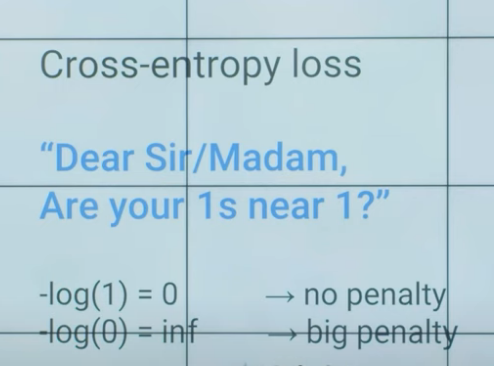

In [186]:
real_values = ['spam', 'spam', 'ham', 'ham', 'spam', 'ham']
computed_outputs = [[0.7, 0.3], [0.2, 0.8], [0.4, 0.6], [0.9, 0.1], [0.7, 0.3], [0.4, 0.6]]

In [187]:
# loss function pentru clasificare binara - log loss, sau Binary Cross Entropy cu computed_outputs in one-hot encoding
from sklearn.metrics import log_loss
print(log_loss(real_values, computed_outputs, labels=['ham','spam']))

0.7615051898953697


In [189]:
def binary_cross_entropy_two_classes(real, computed, positive):
    real_outputs = [[1, 0] if label == positive else [0, 1] for label in real]
    dataset_CE = 0.0
    for i in range(len(real)):
        sample_CE = - sum([real_outputs[i][j] * math.log(computed[i][j])  for j in range(2)])
        dataset_CE += sample_CE
    mean_CE = dataset_CE / len(real)
    return mean_CE

print('CE binary:', binary_cross_entropy_two_classes(real_values, computed_outputs, 'ham'))

CE binary: 0.7615051898953697


In [121]:
#softmax for multi-class detection -> transform the vector of outputs in a one-hot encoding format
#sigmoid for multi-label

In [122]:
def categorical_cross_entropy(real, computed):
  #softmax activation layer over the computed
  CCE = 0 
  for r,c in zip(real, computed):
    softmax_values = [math.exp(value) for value in c]
    sum_for_softmax = sum(softmax_values)
    prob_computed = [value / sum_for_softmax for value in softmax_values]
    CCE += -sum(r[j]*math.log(prob_computed[j]) for j in range(len(r)))
  return CCE

real_multi_class = [[1, 0, 0, 0], [0, 1, 0, 0]]
computed_multi_class = [[5, 2, 2, 1], [2,4,2,1]]

In [123]:
print('CCE multi-class: ', categorical_cross_entropy(real_multi_class, computed_multi_class))

CCE multi-class:  0.38942114877229117


In [234]:
#order panda | dog | cat
real = [['panda', 'cat']]
computed = [[0.6, 0.7, 0.4]]

In [237]:
def binary_cross_entropy_multi_label(real, computed, panda=True):
  if panda == True:
    real_10= [0, 0, 0]
    for value in real:
      if (value == 'panda'):
        real_10[0] = 1 
      if(value == 'dog'):
        real_10[1] = 1
      if(value == 'cat'):
        real_10[2] = 1
  else:
      real_10 = real
  error = -sum(real_10[j]*math.log(computed[j])+(1-real_10[j])*math.log(1-computed[j]) for j in range(len(computed)))
  return error

def multi_label_CE(real, computed, panda=True):
  error = 0
  for r,c in zip(real, computed):
    sigmoid_values = [1 / (1 + math.exp(-val)) for val in c]
    error += binary_cross_entropy_multi_label(r, sigmoid_values, panda)
  return error



In [238]:
print(multi_label_CE(real, computed))
print(binary_cross_entropy_multi_label(['panda', 'cat'], [0.6, 0.7, 0.4], True))

2.0536892517712966
2.6310891599660815
